In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [24]:
df = pd.read_csv(r'C:\Users\devth\Documents\VScode_files\Deep Learning\dropout_reg_dataset\sonar_dataset.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [25]:
# Check for missing values per column
null_counts = df.isnull().sum()

# Display only columns with missing values
print(null_counts[null_counts > 0])


Series([], dtype: int64)


In [26]:
df.shape

(208, 61)

In [27]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [28]:
# creating the x and y variable 

x= df.drop(60,axis=1)
y= df[60]
y=pd.get_dummies(y,drop_first=True)
# Example: converting the 'your_column' column
y = y.astype(int)

y

,R
0,1
1,1
2,1
3,1
4,1
...,...
203,0
204,0
205,0
206,0


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)


In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
model = keras.Sequential([ 
    keras.layers.Dense(60, input_dim=60, activation = 'relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.fit(x_train,y_train,epochs=100,batch_size=8) # we are using mini batch gradient descent

Epoch 1/100


c:\Users\devth\Documents\VScode_files\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5124 - loss: 0.7061   
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - loss: 0.6669 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7641 - loss: 0.6323 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7752 - loss: 0.5941 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6808 - loss: 0.5873 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7878 - loss: 0.5296 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7612 - loss: 0.5318 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8129 - loss: 0.4647 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8583 - loss: 0.4203 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8978 - loss: 0.3689 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8919 - loss: 0.3484 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [32]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7035 - loss: 1.2647 


[1.161289095878601, 0.7115384340286255]

In [33]:
yp = model.predict(x_test)

yp[:5]
y_pred = []

for elements in yp: 
    if elements >0.5:
        y_pred.append(1)
    else: 
        y_pred.append(0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [34]:
y_test[:10]

,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


In [35]:
y_pred[:10]

[0, 1, 1, 0, 1, 1, 0, 1, 0, 1]

In [36]:
# printing the classification report 

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75        27
           1       0.75      0.60      0.67        25

    accuracy                           0.71        52
   macro avg       0.72      0.71      0.71        52
weighted avg       0.72      0.71      0.71        52



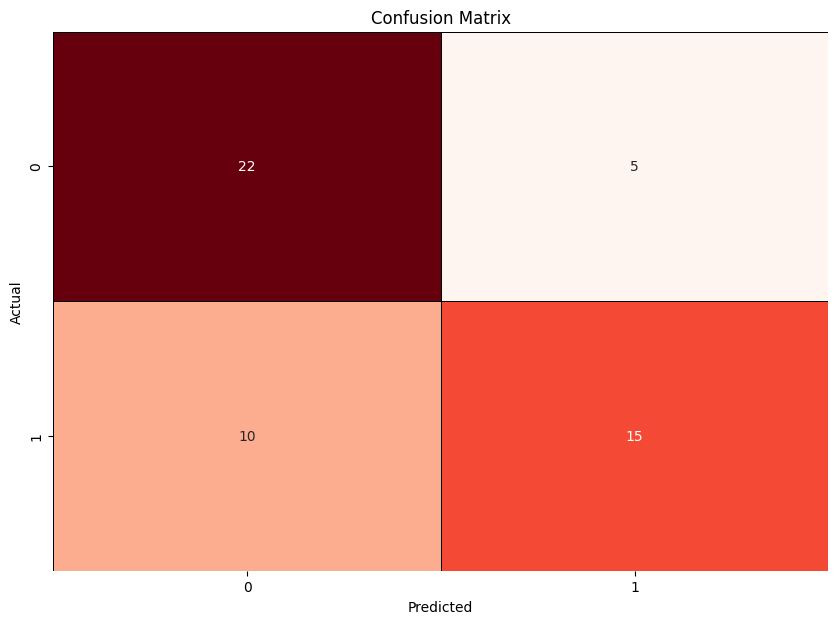

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Calculate confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

# Plot
plt.figure(figsize=(10,7))
sns.heatmap(cm.numpy(),  # convert tf.Tensor to numpy
            annot=True, 
            fmt='g',     # 'g' for general number format (not 'f')
            cmap='Reds',  # better color map
            linewidths=0.5,  # add gridlines
            linecolor='black',
            cbar=False)  # remove color bar if not needed
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [42]:
# trying the drop out layer now 

modeld = keras.Sequential([ 
    keras.layers.Dense(60, input_dim=60, activation = 'relu'),
    keras.layers.Dropout(0.5), # will dropp 505 of the neurons 
    keras.layers.Dense(30, activation = 'relu'),
    # always put a drop out layer after a hidden layer 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid')
])

modeld.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

modeld.fit(x_train,y_train,epochs=100,batch_size=8) # we are using mini batch gradient descent

Epoch 1/100


c:\Users\devth\Documents\VScode_files\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4952 - loss: 0.7529
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5046 - loss: 0.6985 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5547 - loss: 0.6813 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4845 - loss: 0.7182 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5094 - loss: 0.7189 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5150 - loss: 0.6870 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4989 - loss: 0.7002 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5213 - loss: 0.6936 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5036 - loss: 0.6893 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5906 - loss: 0.6791 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6210 - loss: 0.6714 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [43]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7652 - loss: 0.4528


[0.4338030219078064, 0.7884615659713745]

In [45]:
yp = modeld.predict(x_test)

yp[:5]
y_pred = []

for elements in yp: 
    if elements >0.5:
        y_pred.append(1)
    else: 
        y_pred.append(0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [46]:
# printing the classification report 

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.82      0.72      0.77        25

    accuracy                           0.79        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.79      0.79      0.79        52



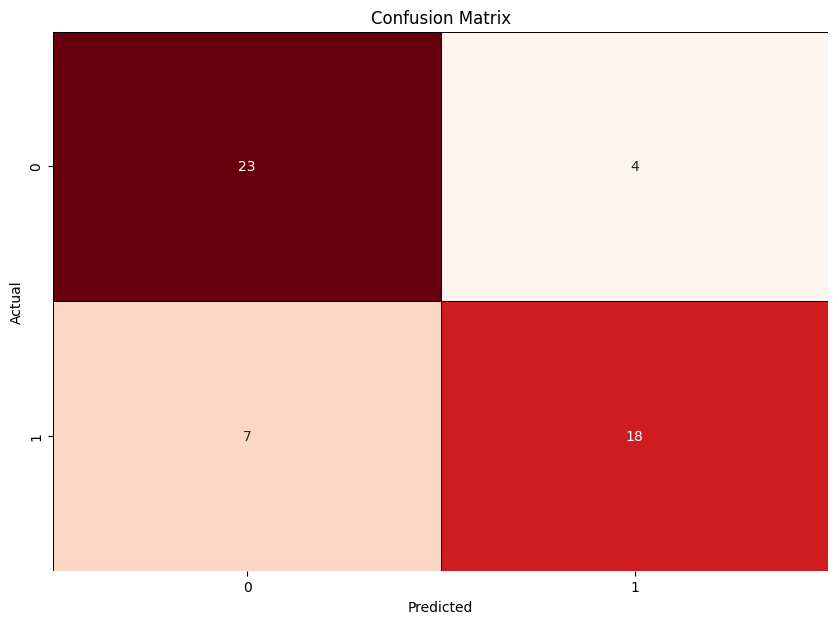

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Calculate confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

# Plot
plt.figure(figsize=(10,7))
sns.heatmap(cm.numpy(),  # convert tf.Tensor to numpy
            annot=True, 
            fmt='g',     # 'g' for general number format (not 'f')
            cmap='Reds',  # better color map
            linewidths=0.5,  # add gridlines
            linecolor='black',
            cbar=False)  # remove color bar if not needed
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
